<a href="https://colab.research.google.com/github/AlexS1L/-Machine-Learning/blob/main/Lorat%C3%B3riodepython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Carregando bibliotecas e se conectando ao Google Drive




In [ ]:
from google.colab import  drive
drive.mount("/content/drive")

Mounted at /content/drive


Leitura dos arquivos a partir do Drive (pasta: Meu Drive/ME315/Python)

In [ ]:
import pandas as pd
flights=pd.read_csv("/content/drive/MyDrive/PythonME315/flights_p1.csv")
flights

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,AIR_TIME
0,6,10,UA,EWR,BOS,-20.0,39.0
1,5,21,OO,SFO,BUR,38.0,52.0
2,12,22,WN,SLC,LAS,53.0,57.0
3,2,26,DL,FLL,JFK,-19.0,133.0
4,8,25,B6,FLL,LGA,6.0,136.0
...,...,...,...,...,...,...,...
999995,12,1,WN,SJC,SNA,-2.0,57.0
999996,8,8,AA,LAX,RDU,-24.0,263.0
999997,6,7,DL,ATL,BNA,-15.0,38.0
999998,3,31,DL,ATL,SAV,37.0,38.0


Selecionando Vôos 


In [ ]:
flights[flights.AIRLINE=="AA"]

In [ ]:
flights.query('AIRLINE=="AA"')

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,AIR_TIME
6,8,8,AA,MKE,DFW,17.0,115.0
12,11,18,AA,CLT,MSP,-17.0,122.0
18,6,12,AA,TPA,DFW,4.0,134.0
22,5,11,AA,LAX,STL,2.0,180.0
24,3,17,AA,MIA,SFO,-41.0,329.0
...,...,...,...,...,...,...,...
999974,2,26,AA,DFW,LGA,-22.0,156.0
999981,12,3,AA,DFW,PDX,-16.0,224.0
999983,6,22,AA,SJU,MIA,1063.0,131.0
999991,12,17,AA,DFW,CLT,18.0,113.0


In [ ]:
flights.query('AIRLINE=="AA"').groupby("DESTINATION_AIRPORT").mean().ARRIVAL_DELAY

In [ ]:
flights.head()

In [ ]:
flights.tail()

In [ ]:
flights[['AIRLINE','DESTINATION_AIRPORT','ARRIVAL_DELAY']]

,AIRLINE,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,UA,BOS,-20.0
1,OO,BUR,38.0
2,WN,LAS,53.0
3,DL,JFK,-19.0
4,B6,LGA,6.0
...,...,...,...
999995,WN,SNA,-2.0
999996,AA,RDU,-24.0
999997,DL,BNA,-15.0
999998,DL,SAV,37.0


Qual é o atraso médio para cada combinação de cia aérea e aeroporto?


In [ ]:
flights[['AIRLINE','DESTINATION_AIRPORT','ARRIVAL_DELAY']].groupby(['AIRLINE', 'DESTINATION_AIRPORT']).mean().round(2)

ARRIVAL_DELAY
AIRLINE DESTINATION_AIRPORT               
AA      10140                         2.86
        10257                         7.50
        10299                        -3.20
        10397                         1.88
        10423                         2.08
...                                    ...
WN      SNA                           2.18
        STL                           3.75
        TPA                           3.64
        TUL                          10.25
        TUS                           8.07

[2354 rows x 1 columns]

In [ ]:
flights.loc[0:100]

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,AIR_TIME
0,6,10,UA,EWR,BOS,-20.0,39.0
1,5,21,OO,SFO,BUR,38.0,52.0
2,12,22,WN,SLC,LAS,53.0,57.0
3,2,26,DL,FLL,JFK,-19.0,133.0
4,8,25,B6,FLL,LGA,6.0,136.0
...,...,...,...,...,...,...,...
96,10,19,OO,10561,14771,109.0,47.0
97,10,16,AA,13204,11298,-13.0,142.0
98,4,21,OO,PSC,DEN,-17.0,115.0
99,3,6,AS,ANC,JNU,4.0,74.0


Renomear colunas


In [ ]:
flights.rename(columns={"AIRLINE":"Cia","ARRIVAL_DELAY":"ATRASO"})

In [ ]:
flights.columns.tolist()

In [ ]:
flights.dropna().shape

(981915, 7)

In [ ]:
flights['HORA_VOO']=flights.AIR_TIME/60
flights['HORA_VOO']

In [ ]:
flights.assign(ATRASO_HORAS=flights['ARRIVAL_DELAY']/60).round(2)

Para obtenção dos tipos de cada colunas

In [ ]:
flights.dtypes

MONTH                    int64
DAY                      int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
ARRIVAL_DELAY          float64
AIR_TIME               float64
HORA_VOO               float64
dtype: object

In [ ]:
flights.describe()

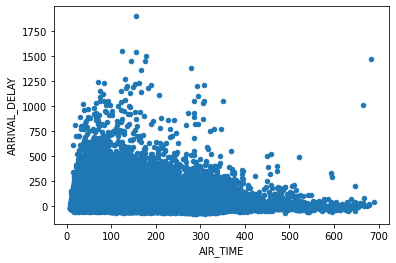

In [ ]:
flights.plot.scatter(x='AIR_TIME',y='ARRIVAL_DELAY')

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 18085 rows containing missing values.


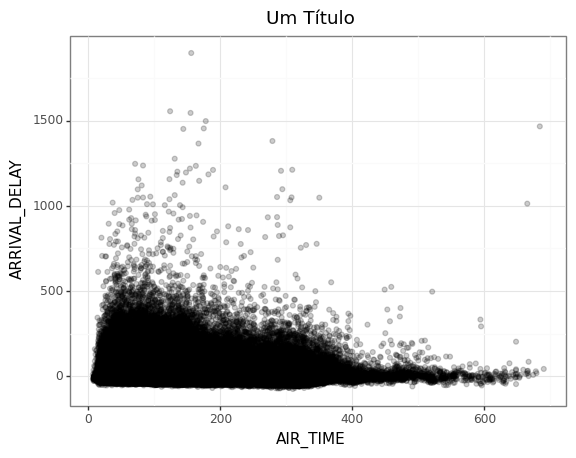

<ggplot: (8778929354085)>

In [ ]:
from plotnine import ggplot, geom_point, aes, theme_bw, labs
ggplot(flights)+geom_point(aes(x='AIR_TIME',y='ARRIVAL_DELAY'),alpha=.2)+theme_bw()+labs(title="Um Título")

